In [1]:
from cufinufft import Plan
import numpy as np
import time
epsilon = 1e-9
isign = 1
n_trans = 1
nuFFT_dtype = np.float64
nuFFTtype = 2
nuFFTshape = tuple((np.array([1000, 1000])*16).astype(int))
print(nuFFTshape)
nuFFTplan = Plan(nuFFTtype, nuFFTshape, n_trans, epsilon, isign, nuFFT_dtype, gpu_method=2, gpu_sort=1, gpu_kerevalmeth=0, upsampfac=2.0)
# time.sleep(5)
# del nuFFTplan

(16000, 16000)


In [2]:
np.sqrt(150994944), (2*8000)**2, 256 000 000

(12288.0, 256000000)

In [9]:
nuFFTplan.__dict__, 75 497 472

{'_plan': c_void_p(27211888),
 'dtype': numpy.complex128,
 '_make_plan': <_FuncPtr object at 0x155548294580>,
 '_setpts': <_FuncPtr object at 0x155548294700>,
 '_exec_plan': <_FuncPtr object at 0x155548294880>,
 '_destroy_plan': <_FuncPtr object at 0x155548294a00>,
 'real_dtype': numpy.float64,
 'dim': 2,
 'type': 2,
 'isign': 1,
 'eps': 1e-09,
 'n_modes': (14000, 14000),
 'n_trans': 1,
 '_maxbatch': 1,
 '_opts': <cufinufft._cufinufft.NufftOpts at 0x15554859cdc0>,
 '_references': []}

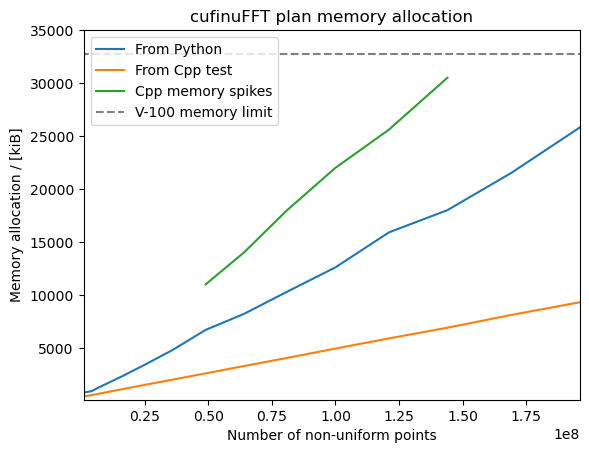

In [13]:
import matplotlib.pyplot as plt
import numpy as np
shapearr = np.arange(1000,15000,1000)
# 11000 at 8
memarr = [780, 900, 1500, 2300, 3400, 4800, 6700, 8200, 10300, 12600, 15900, 18000, 21500, 25800]
memarr_cpp_spike =  [np.nan, np.nan, np.nan, np.nan, np.nan, np.nan, 11000, 14000, 18000, 22000, 25600, 30500, np.nan, np.nan]
memarr_cpp =        [400, 537, 760, 1090, 1500, 2000, 2590, 3280, 4050, 4930, 5890, 6900, 8100, 9300]
plt.plot(shapearr**2, memarr, label='From Python')
plt.plot(shapearr**2, memarr_cpp, label='From Cpp test')
plt.plot(shapearr**2, memarr_cpp_spike, label='Cpp memory spikes')
plt.hlines(32768,0,np.max(shapearr**2),label='V-100 memory limit', color='grey', ls='--')

plt.title("cufinuFFT plan memory allocation")
plt.xlabel("Number of non-uniform points")
plt.ylabel('Memory allocation / [kiB]')
plt.legend()
plt.ylim(1e2,35000)
plt.xlim(1e6,14000**2)
# plt.loglog()
plt.show()

In [4]:
shapearr

array([    0,  1000,  2000,  3000,  4000,  5000,  6000,  7000,  8000,
        9000, 10000, 11000, 12000, 13000])

In [ ]:
121 000 000